In [1]:
# Written by Herman van Haagen. https://www.linkedin.com/in/hermanvanhaagen/

# Neural network backpropagation using the Iris dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Functions
First we are going to define a couple of functions. These functions make the main code (neural network) more readable. 

In [3]:
# the onehone encoding function. For instance a 2 becomes [0,0,1]
def onehotencoding(x):
    onehot = np.zeros(3)
    onehot[x] = 1
    onehot = onehot[:,np.newaxis]
    return onehot

In [4]:
# The softmax activation function
def softmax(x):
    y = np.exp(x)/np.sum(np.exp(x))
    return y

In [5]:
def selectInstance(dataset, index):
    # For stochastic gradient descent select one instance at a time. 
    X = dataset[index,:]
    X = X[:,np.newaxis]
    return X

### Loading the data
We are going to load the iris dataset https://www.kaggle.com/datasets/arshid/iris-flower-dataset. Download this dataset first. 

In [6]:
iris = pd.read_csv("IRIS.csv")

In [7]:
# Check for convenience the data if it is correct
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Map the labels to values 0, 1, and 2
iris['species']=iris['species'].map({'Iris-virginica':2,'Iris-setosa':1,'Iris-versicolor':0})

In [9]:
features = iris[['sepal_length', 'sepal_width','petal_length','petal_width']]
label = iris['species']

In [10]:
# We are going to do a train-test split of 20% using sklearn. 
X_train, X_test, label_train, label_test = train_test_split (features, label,test_size=0.2,stratify=label)

In [11]:
# this train-test split should result in 120 instances for the trainset
# and 30 instances for the testset
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [12]:
# We need to scale the data between 0 and 1. We use the MinMax scaler for this. 
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# We convert the pandas dataframe to a numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
label_train = np.array(label_train)
label_test = np.array(label_test)

### Training the neural network
For training the neural network we first have to initialize weights and bias. 
We make use of matrix notation. Pay special attention to the softmax function and its derivative which is very simple. Also pay special attention to the transpose of the vector X. This is needed to get the dimensions right during matrix multiplication. 

In [14]:
# initialize the weights and the bias
# We have 4 input features and 3 class labels. Hence we get (3,4)
W = np.random.rand(3,4)
B = np.random.rand(3,1)

In [15]:
lr = 0.01 # learning rate
epochs = 500 # since iris is a small dataset we need many epochs to converge

In [16]:
for epoch in range(epochs):
    #print('epoch: '+str(epoch))
    for k in range(120): #train
        
        # Forward pass
        X = selectInstance(X_train, k)
        z = np.matmul(W,X) + B
        y = softmax(z)
        
        # Backpropagation
        label = label_train[k]
        onehot = onehotencoding(label)
        error = (y-onehot) # the nice derivative of the softmax
        
        deltaW = np.matmul(error,np.transpose(X))
        deltaB = error
        
        # update rules
        W = W - lr*deltaW
        B = B - lr*deltaB

### Validate the trained neural network on the testset

In [17]:
confusionmatrix = np.zeros([3, 3], dtype = int)

In [18]:
# Calculate the predictions on the test set
for k in range(30): #test
    
    X = selectInstance(X_test, k )
    z = np.matmul(W,X) + B
    y = softmax(z)

    label = label_test[k]
    onehot = onehotencoding(label)

    ind  = np.argmax(onehot)
    pred = np.argmax(y)
    confusionmatrix[pred, ind] = confusionmatrix[pred, ind] + 1

In [19]:
print(confusionmatrix)

[[10  0  1]
 [ 0 10  0]
 [ 0  0  9]]


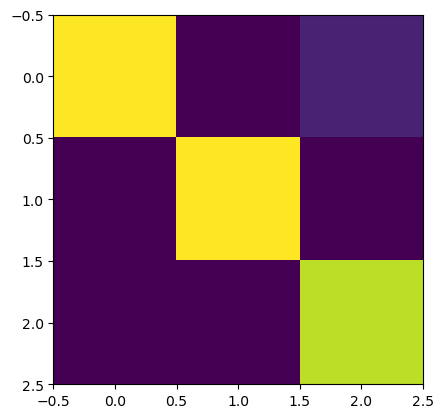

In [20]:
plt.imshow(confusionmatrix)

In [21]:
# calculate the accuracy from the confusion matrix
np.sum(confusionmatrix*np.identity(3))/np.sum(confusionmatrix)

0.9666666666666667